In [2]:
import tensorflow as tf
tf.get_logger().setLevel('ERROR')

In [3]:
import pennylane as qml
#!pip install pennylane --upgrade
import scipy.io as sio
import numpy as np

In [4]:
import scipy
labels=sio.loadmat("labels.mat")
feat=sio.loadmat("features.mat")

lab=labels['labels']
labels=np.array([i for i in lab])
feat=feat['features']
feat_final=[]
     
for i in range(0,162):
    norm = np.linalg.norm(feat[i])
    if norm == 0:
        feat[i][0] =1
        norm = 1
    
    feat[i] = feat[i]/norm

for i in range(0,162):
    if np.around(np.linalg.norm(feat[i]),5) !=1:
        print("fail")




In [5]:
qml.about()

Name: PennyLane
Version: 0.29.1
Summary: PennyLane is a Python quantum machine learning library by Xanadu Inc.
Home-page: https://github.com/XanaduAI/pennylane
Author: None
Author-email: None
License: Apache License 2.0
Location: /home/x-suriya1991/.local/lib/python3.8/site-packages
Requires: autoray, retworkx, toml, cachetools, numpy, scipy, autograd, semantic-version, pennylane-lightning, appdirs, networkx, requests
Required-by: PennyLane-Lightning

Platform info:           Linux-4.18.0-425.3.1.el8.x86_64-x86_64-with-glibc2.10
Python version:          3.8.8
Numpy version:           1.20.1
Scipy version:           1.6.2
Installed devices:
- default.gaussian (PennyLane-0.29.1)
- default.mixed (PennyLane-0.29.1)
- default.qubit (PennyLane-0.29.1)
- default.qubit.autograd (PennyLane-0.29.1)
- default.qubit.jax (PennyLane-0.29.1)
- default.qubit.tf (PennyLane-0.29.1)
- default.qubit.torch (PennyLane-0.29.1)
- default.qutrit (PennyLane-0.29.1)
- null.qubit (PennyLane-0.29.1)
- lightning.qu

# Strongly entangling layers

In [6]:

import pennylane as qml
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
#model parameters using aplitude encoding
n_qubits = 4
length = 2**n_qubits
depth =1 




dev = qml.device("default.qubit", wires=n_qubits)
@qml.qnode(dev)
def qnode(inputs, weights):
    qml.templates.AmplitudeEmbedding(inputs, wires=range(n_qubits),normalize=True) 
    qml.templates.StronglyEntanglingLayers(weights, wires=range(n_qubits))
    return [qml.expval(qml.PauliZ(wires=i)) for i in range(n_qubits)]



weight_shapes = {"weights": (depth, n_qubits,3)}
classes=3

qlayer = qml.qnn.KerasLayer(qnode, weight_shapes, output_dim=n_qubits)
clayer = tf.keras.layers.Dense(classes, activation="softmax")

# specify inputs
inputs = tf.keras.Input(shape=(2**n_qubits,))
# av = tf.math.l2_normalize(    inputs, axis=None, epsilon=1e-12, name=None, dim=None)
# av=tf.linalg.normalize(
#     inputs, ord='euclidean', axis=None, name=None
# )

x = qlayer(inputs)
outputs = clayer(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

opt = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(opt, loss='categorical_crossentropy')
model.summary()
model.get_weights()





Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 16)]              0         
                                                                 
 keras_layer (KerasLayer)    (None, 4)                 0 (unused)
                                                                 
 dense (Dense)               (None, 3)                 15        
                                                                 
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


[array([[ 0.1337254 ,  0.5184581 , -0.52523816],
        [ 0.29777312,  0.89738536, -0.88682944],
        [ 0.7199348 ,  0.5157492 ,  0.67439234],
        [ 0.38072503,  0.48477805,  0.43832326]], dtype=float32),
 array([0., 0., 0.], dtype=float32)]

In [7]:
X = np.array(feat)
Y=np.array(labels)
Y = Y.reshape((len(Y), 1))
n1=40#40
n2=96
n=162
y=Y
x=X
y=Y#/max(abs(Y)) #scaling output (0,1) 
y1=[]
for i in y:
    if i[0]==1:
        y1.append(np.array([1,0,0]))
    if i[0]==2:
        y1.append(np.array([0,1,0]))
    if i[0]==3:
        y1.append(np.array([0,0,1]))
y1=y1[0:n1]+y1[n2:n]
x=list(x)
x=x[0:n1]+x[n2:n]
y=y1
x=np.array(x)
y=np.array(y)
#y=np.array(y1)[0:n]
#print(y)
#np.shape(x)
#np.shape(y1)

Epoch 1/500
6/6 [==============================] - 5s 835ms/step - loss: 0.8150
Epoch 2/500
6/6 [==============================] - 5s 835ms/step - loss: 0.8124
Epoch 3/500
6/6 [==============================] - 5s 853ms/step - loss: 0.8143
Epoch 4/500
6/6 [==============================] - 5s 834ms/step - loss: 0.8174
Epoch 5/500
6/6 [==============================] - 5s 853ms/step - loss: 0.8137
Epoch 6/500
6/6 [==============================] - 5s 834ms/step - loss: 0.8101
Epoch 7/500
6/6 [==============================] - 5s 853ms/step - loss: 0.8096
Epoch 8/500
6/6 [==============================] - 5s 835ms/step - loss: 0.8116
Epoch 9/500
6/6 [==============================] - 5s 835ms/step - loss: 0.8089
Epoch 10/500
6/6 [==============================] - 5s 836ms/step - loss: 0.8095
Epoch 11/500
6/6 [==============================] - 5s 835ms/step - loss: 0.8093
Epoch 12/500
6/6 [==============================] - 5s 853ms/step - loss: 0.8087
Epoch 13/500
6/6 [===================

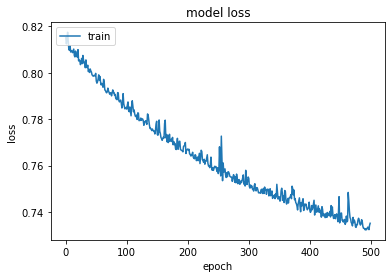

4/4 [==============================] - 2s 549ms/step


(array([[ 6.,  5., 11.,  9.,  9., 28., 13., 14.,  6.,  5.],
        [ 3.,  6.,  7., 11.,  3., 37., 16., 16.,  0.,  7.],
        [ 8., 14.,  5.,  5.,  4., 10., 28., 26.,  4.,  2.]]),
 array([-0.87072791, -0.70581781, -0.5409077 , -0.3759976 , -0.2110875 ,
        -0.04617739,  0.11873271,  0.28364281,  0.44855292,  0.61346302,
         0.77837312]),
 <a list of 3 BarContainer objects>)

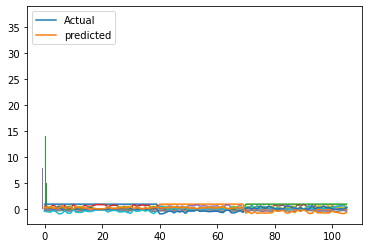

In [20]:
history = model.fit(x, y, epochs=500,batch_size=20)
model.get_weights()

model.summary()
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

pred = model.predict(x)
plt.plot(y)
plt.plot(pred)
plt.legend(['Actual','predicted'], loc='upper left')

sortit=[(y[i],pred[i]) for i in range(0,len(y))]
sortit=np.sort(sortit)
diff_sort=[i[0]-i[1] for i in sortit]
plt.plot(diff_sort)
plt.plot((pred-y))
plt.hist(pred-y)


In [21]:

pred_fin=np.argmax(pred,axis=-1)
print(pred)

[[6.10434711e-01 1.15865462e-01 2.73699909e-01]
 [5.48882186e-01 1.81663558e-01 2.69454181e-01]
 [4.61899757e-01 1.95585921e-01 3.42514277e-01]
 [7.78474987e-01 1.21877538e-02 2.09337264e-01]
 [5.46483517e-01 1.86114684e-01 2.67401725e-01]
 [1.29272088e-01 6.33180678e-01 2.37547204e-01]
 [2.18778402e-01 2.84850644e-03 7.78373122e-01]
 [7.32102394e-01 7.44773969e-02 1.93420231e-01]
 [2.78607637e-01 4.23959583e-01 2.97432721e-01]
 [2.52405256e-01 3.57590765e-01 3.90003949e-01]
 [9.30997849e-01 4.02961969e-02 2.87060551e-02]
 [4.33374256e-01 3.76140303e-03 5.62864244e-01]
 [4.18930113e-01 2.88045436e-01 2.93024391e-01]
 [4.41450179e-01 2.71028936e-01 2.87520856e-01]
 [7.64475882e-01 2.06207507e-03 2.33462080e-01]
 [6.01355195e-01 1.58042461e-01 2.40602314e-01]
 [5.69817066e-01 3.62445682e-01 6.77371770e-02]
 [7.46535659e-01 6.52429760e-02 1.88221261e-01]
 [9.07931089e-01 4.57389251e-04 9.16115120e-02]
 [9.10881639e-01 1.17174140e-03 8.79466385e-02]
 [9.03916121e-01 9.31111106e-04 9.515278

In [22]:
max_pred=[max(pred[i]) for i in range(0,len(pred))]
index_list=[list(pred[i]).index(max_pred[i]) for i in range(0,len(max_pred))]

In [23]:
np.array(index_list)+1

array([1, 1, 1, 1, 1, 2, 3, 1, 2, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2,
       2, 3, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 1,
       1, 2, 2, 2, 1, 3, 1, 3, 1, 2, 2, 1, 2, 1, 3, 3, 3, 3, 2, 2, 3, 3,
       3, 3, 3, 3, 1, 2, 3, 2, 3, 2, 1, 2, 3, 1, 1, 1, 1, 3])

In [25]:
len(index_list)

106